<a href="https://colab.research.google.com/github/Diyari-Kurdi/tensorflow-test/blob/main/tensorboard_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [21]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [22]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [24]:
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

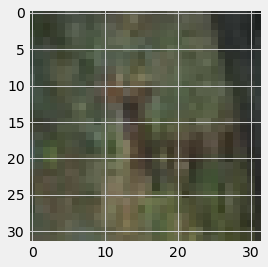

In [25]:
img = plt.imshow(x_train[index])

In [26]:
print('Image label :',y_train[index])

Image label : [4]


In [27]:
classification =['airplane','automobile','brid','cat','deer','dog','frog','horse','ship','truck']
print('The image class is:',classification[y_train[index][0]])

The image class is: deer


In [28]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [29]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [30]:
print('The one hot label is:',y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [31]:
x_train=x_train/ 255
x_test=x_test/ 255

In [32]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [33]:
model=Sequential()

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),activation='relu') )

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
hist = model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 356ms/step - loss: 1.8037 - accuracy: 0.3316 - val_loss: 1.5157 - val_accuracy: 0.4459
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 1.4543 - accuracy: 0.4694 - val_loss: 1.3480 - val_accuracy: 0.5188
Epoch 3/10
157/157 [==============================] - 55s 349ms/step - loss: 1.3001 - accuracy: 0.5336 - val_loss: 1.2322 - val_accuracy: 0.5714
Epoch 4/10
157/157 [==============================] - 55s 352ms/step - loss: 1.1946 - accuracy: 0.5745 - val_loss: 1.2385 - val_accuracy: 0.5641
Epoch 5/10
157/157 [==============================] - 55s 349ms/step - loss: 1.1133 - accuracy: 0.6064 - val_loss: 1.0584 - val_accuracy: 0.6286
Epoch 6/10
157/157 [==============================] - 56s 357ms/step - loss: 1.0414 - accuracy: 0.6316 - val_loss: 1.0833 - val_accuracy: 0.6238
Epoch 7/10
157/157 [==============================] - 55s 351ms/step - loss: 0.9755 - accuracy: 0.6577 - val_loss: 1.0013 - val_ac

In [36]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9641 - accuracy: 0.6636


0.6636000275611877

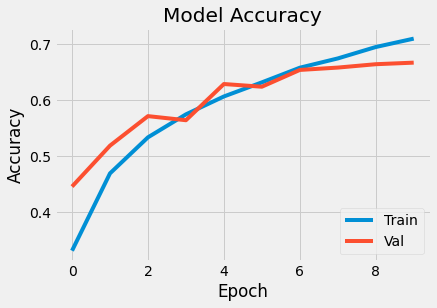

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

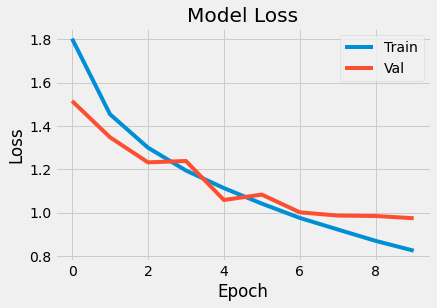

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [45]:
from google.colab import files
uploaded=files.upload()

Saving dog.jpeg to dog.jpeg


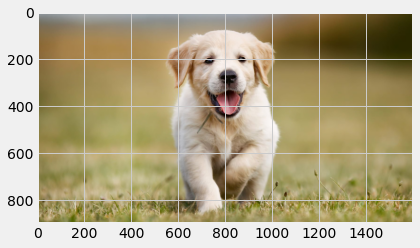

In [46]:
new_image=plt.imread('dog.jpeg')
img=plt.imshow(new_image)

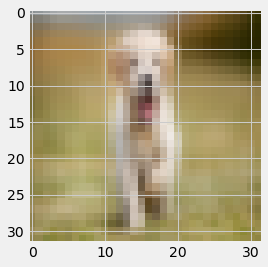

In [47]:
from skimage import transform as ts
resized_image=ts.resize(new_image,(32,32,3))
img=plt.imshow(resized_image)


In [48]:
predections=model.predict(np.array([resized_image]))
predections

array([[5.1603321e-04, 3.0105705e-06, 1.8942162e-01, 1.3201054e-02,
        2.4894169e-03, 7.6721358e-01, 7.5528653e-05, 2.7011905e-02,
        8.8786001e-06, 5.9022434e-05]], dtype=float32)

In [49]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predections
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] >x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp

print(list_index)

[5, 2, 7, 3, 4, 0, 6, 9, 8, 1]


In [50]:
for i in range(5):
    print(classification[list_index[i]],':',round(predections[0][list_index[i]]*100,2),'%')

dog : 76.72 %
brid : 18.94 %
horse : 2.7 %
cat : 1.32 %
deer : 0.25 %
